## Introduction

In this tutorial we look at numerous examples of how `dicomsplit` works.

In [1]:
from fastai.vision.all import *
from fastai.tabular.all import *
from fastai.medical.imaging import *

from fmi.explore import *
from fmi.preprocessing import *
from fmi.pipeline import *

In [2]:
from nbdev.showdoc import *

`check_duplicate` is a handy `fmi` function that checks to see if there are any duplicate patients in the train and valid indexes.  It displays a histograph of the train/valid split both before and after `dicomsplit`

In [27]:
show_doc(check_duplicate)

<h4 id="check_duplicate" class="doc_header"><code>check_duplicate</code><a href="https://github.com/asvcode/fmi/tree/master/fmi/preprocessing.py#L156" class="source_link" style="float:right">[source]</a></h4>

> <code>check_duplicate</code>(**`items`**, **`valid_pct`**=*`0.2`*, **`seed`**=*`5`*)

Helper for dicomsplit to visualize duplicates

### SIIM_Small Dataset

In [28]:
pneumothorax_source = untar_data(URLs.SIIM_SMALL)
pneumo_items = get_dicom_files(pneumothorax_source)
pneumo_items

(#276) [Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000000.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000000C.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000002.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000005.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000006.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000006C.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000007.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000008.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000009.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000011.dcm')...]

Train: 221 
 Original Validation: 55 
 Updated Validation: 46


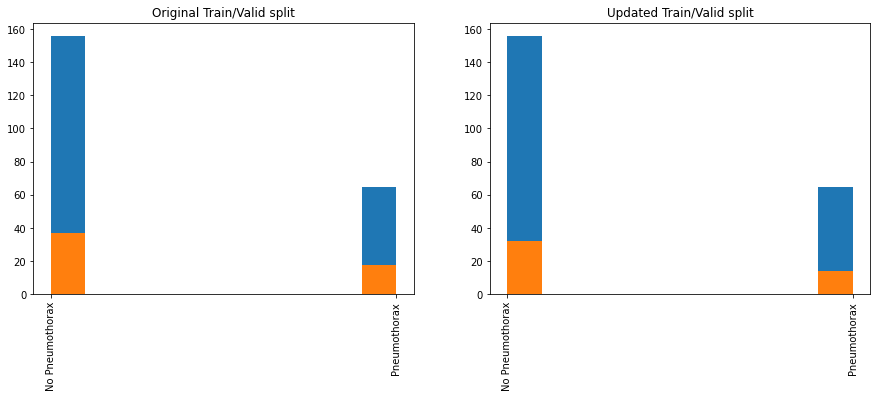

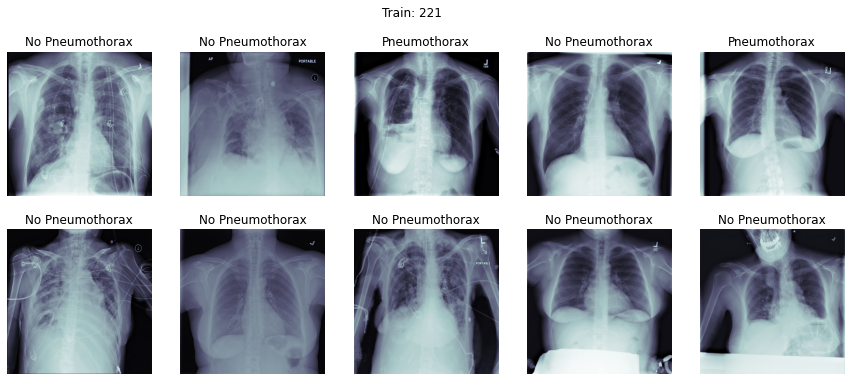

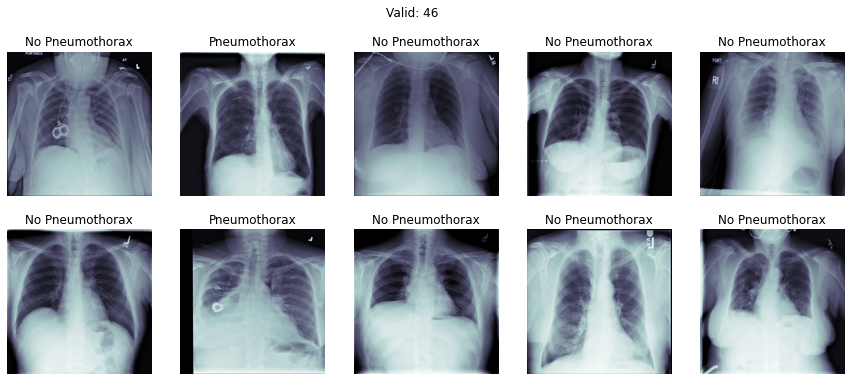

In [29]:
check_duplicate(pneumo_items, valid_pct=0.2, seed=7)

### OSIC Pulmonary Fibrosis Dataset

In [30]:
osic = 'D:/Datasets/osic-pulmonary-fibrosis-progression/train'
osic_items = get_dicom_files(osic)
osic_items

(#32684) [Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/1.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/10.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/11.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/12.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/13.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/14.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/15.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/16.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/17.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/18.dcm')...]

`fmi` has a convenient `random_` function that can be used to generate a random index.  We use this to create a smaller random dataset for convenience to show how `dicomsplitter` works.  in this case we generate a random list of `100`

In [31]:
rand_osic = random_(osic_items, value=500)
rand_osic

(#500) [Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00190637202244450116191/135.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00108637202209619669361/253.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00078637202199415319443/736.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00138637202231603868088/287.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00323637202285211956970/44.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00290637202279304677843/122.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00170637202238079193844/113.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00241637202264294508775/88.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00317637202283194142136/327.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00329637202285906759848/248.dcm')...]

Train: 350 
 Original Validation: 150 
 Updated Validation: 12


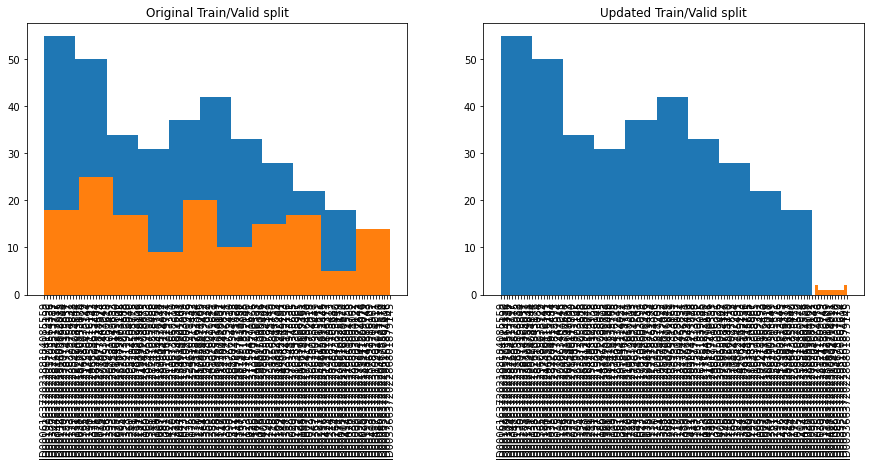

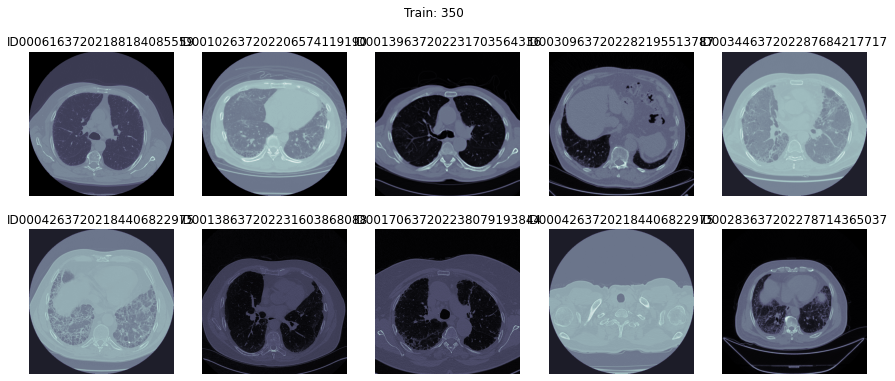

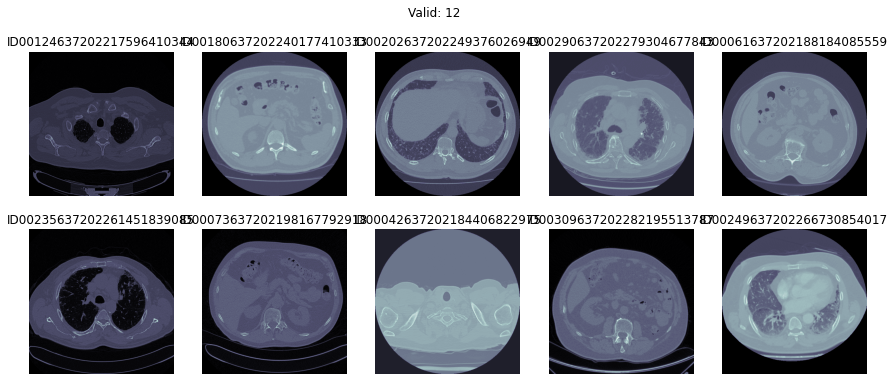

In [17]:
check_duplicate(rand_osic, valid_pct=0.3, seed=7)

### RSNA Pneumonia Dataset

In [7]:
rsna = 'D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images'
rsna_items = get_dicom_files(rsna)
rand_rsna = random_(rsna_items, value=500)
rand_rsna

(#500) [Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/0428e86e-a279-4bdf-9b73-c9eead06a4e7.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/fb1a132a-f87e-4d4b-816c-31eb4b4e28c6.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/9e46150f-1318-4ad7-be4f-67cbabfcac8f.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/51946669-09d0-4fb6-9e00-225e68d55201.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/6fa64f88-7577-402b-a184-81bd235babfe.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/ea5f9e4f-2005-4588-9c2c-39ef89731993.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/a2d83dd1-82b4-49c5-bbf1-b913a937a85c.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/f82e1593-34de-4cd1-8a54-bf7f25f22e44.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/sta

Train: 400 
 Original Validation: 100 
 Updated Validation: 96


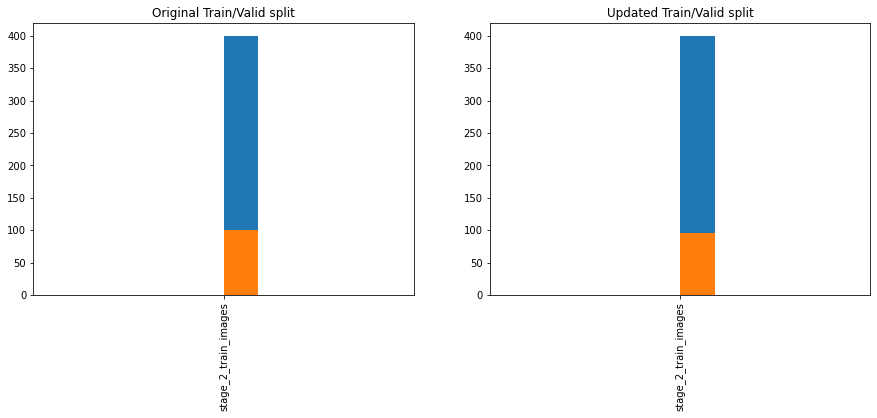

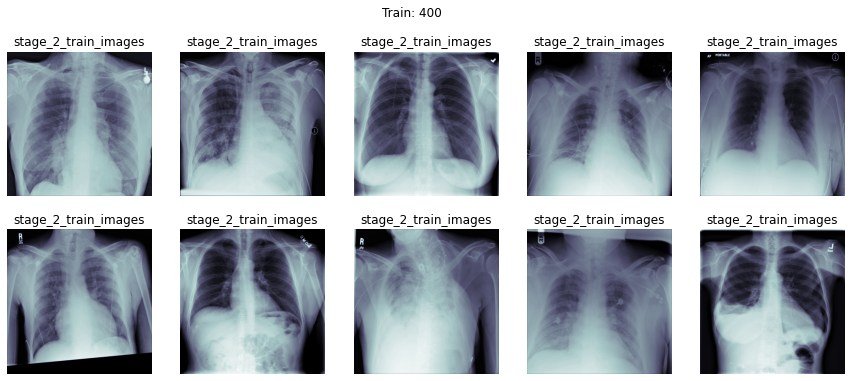

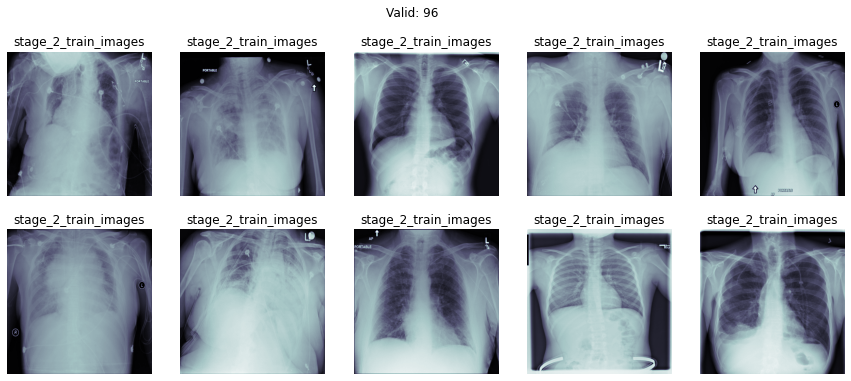

In [8]:
check_duplicate(rand_rsna, valid_pct=0.2, seed=7)